C:\Users\bdall\PycharmProjects\PythonProject\lightening strikes dataset


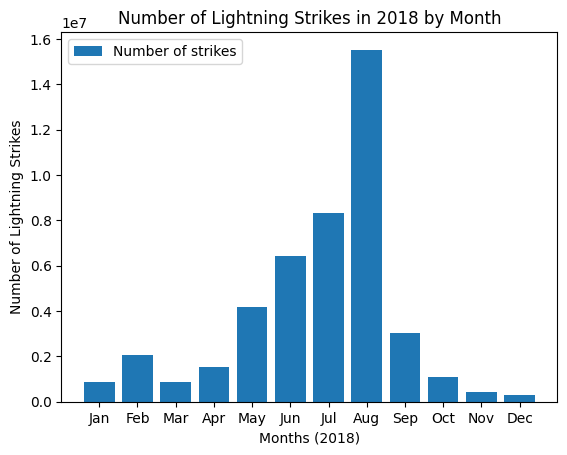

In [30]:
import os
print(os.getcwd())

os.chdir(r"C:\Users\bdall\PycharmProjects\PythonProject\lightening strikes dataset")

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv("lightening strikes dataset.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and month name
df['month'] = df['date'].dt.month
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)

# Group by month and sum numeric columns
df_by_month = (
    df.groupby(['month', 'month_txt'])
      .sum(numeric_only=True)
      .sort_values('month')  # ensures chronological order
      .reset_index()
)

# Plot bar chart
plt.bar(x=df_by_month['month_txt'], height=df_by_month['number_of_strikes'], label="Number of strikes")

plt.xlabel("Months (2018)")
plt.ylabel("Number of Lightning Strikes")
plt.title("Number of Lightning Strikes in 2018 by Month")
plt.legend()
plt.show()

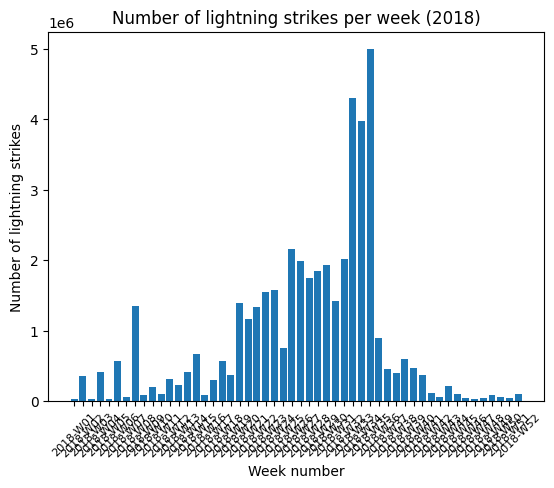

,quarter,number_of_strikes,number_of_strikes_formatted
0,2018-Q1,3785528,3.8M
1,2018-Q2,12136148,12.1M
2,2018-Q3,26863991,26.9M
3,2018-Q4,1815322,1.8M


In [40]:
import seaborn as sns

df['month'] = df['date'].dt.month

df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum('numeric_only=True').reset_index()

plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter = df.groupby(['quarter']).sum('numeric_only=True').reset_index()
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

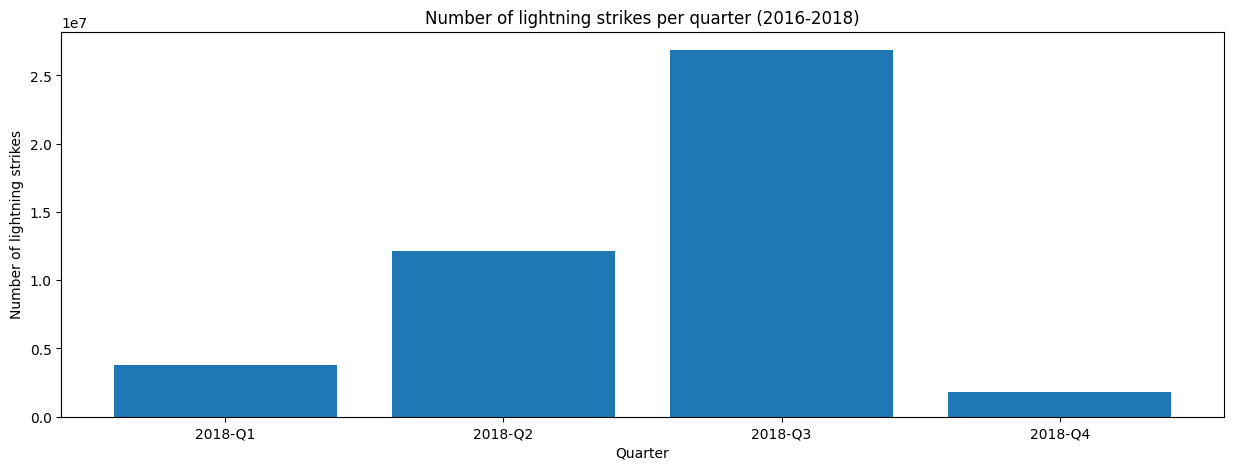

In [42]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels = (df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()